<a href="https://colab.research.google.com/github/pedro-hernandez-esquivias/Programacion/blob/main/Caso_real_kNN_pedro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Detección de diabetes en pacientes mediante kNN**

**Resumen General**
Este cuaderno Jupyter se centra en la construcción de un modelo de aprendizaje automático utilizando el algoritmo k-Nearest Neighbors (kNN) para predecir la presencia de diabetes en pacientes, basándose en el "Pima Indians Diabetes Dataset". A través de un enfoque práctico y detallado, el cuaderno guía a los alumnos en el proceso de desarrollo de un modelo predictivo, desde la carga y exploración de datos hasta la evaluación del modelo.

**Aspectos Clave**
* **Carga y Exploración de Datos**: Se inicia con la importación de librerías necesarias y la carga del conjunto de datos. Se realiza una exploración inicial para entender la estructura y naturaleza de los datos.

* **Preparación de Datos**: Se divide el conjunto de datos en conjuntos de entrenamiento y prueba, utilizando una estratificación para mantener la proporción de las etiquetas.

* **Entrenamiento del Modelo**: Se entrena un modelo kNN con diferentes valores de K para encontrar el equilibrio óptimo entre precisión de entrenamiento y prueba.

* **Evaluación del Modelo**: Se evalúa el modelo utilizando varias métricas, incluyendo la precisión, la matriz de confusión, el informe de clasificación y la curva ROC.

* **Ajuste de Hiperparámetros**: Se utiliza GridSearchCV para el ajuste de hiperparámetros, buscando el valor óptimo de K que maximiza la precisión del modelo.

**Pasos recomendados y cuestiones**
* **Análisis Exploratorio de Datos**: ¿Podríamos profundizar más en el análisis exploratorio para entender mejor las características y su relación con la etiqueta objetivo?

* **Preprocesamiento de Datos**: ¿Sería útil aplicar técnicas de normalización o estandarización a los datos? ¿Cómo podrían estas técnicas afectar el rendimiento del modelo kNN?

* **Validación Cruzada**: ¿Podríamos emplear la validación cruzada para obtener una estimación más robusta del rendimiento del modelo?

* **Interpretación de Resultados**: ¿Cómo interpretaríamos la matriz de confusión y el informe de clasificación en términos de la capacidad del modelo para detectar casos positivos y negativos de diabetes?

* **Mejoras en el Modelo**: ¿Qué otras técnicas o algoritmos podríamos explorar para mejorar la precisión de la detección de diabetes?

* **Importancia de las Características**: ¿Cómo podríamos determinar qué características son más importantes para la predicción de la diabetes?

## 1.1 Cargar CSV de Drive

In [ ]:
# Conexión con drive para obtener el .csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2 Importe de librerías

In [4]:
# Se importan las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 1.3 Exploración de los datos

In [5]:
# Carga del dataset
df = pd.read_csv('/content/diabetes.csv')

# Hacemos un print del dataset para ver qué contiene
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**Pregnancies**: Número de embarazos.

**Glucose**: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia oral a la glucosa.

**BloodPressure**: Presión arterial diastólica (mm Hg).

**SkinThickness**: Grosor del pliegue cutáneo del tríceps (mm).

**Insulin**: Insulina sérica de 2 horas (mu U/ml).

**BMI**: Índice de masa corporal (peso en kg/(altura en m)^2).

**DiabetesPedigreeFunction**: Una función que representa la predisposición genética a la diabetes.

**Age**: Edad (años).

**Outcome**: Variable de clase (0 o 1) donde 1 indica la presencia de diabetes y 0 su ausencia.

In [6]:
# Qué forma tiene el dataframe
df.shape

(768, 9)

Tenemos 768 filas y 9 columnas. Las primeras 8 columnas representan las características (dimensiones) y la última columna representa el target/etiqueta.

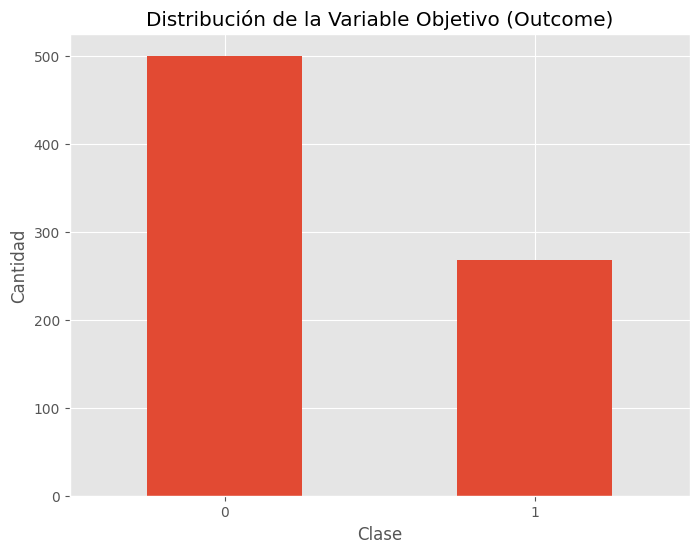

In [7]:
# Distribución del 'Outcome'
# Conteo de las clases en la columna 'Outcome'
outcome_counts = df['Outcome'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar')
plt.title('Distribución de la Variable Objetivo (Outcome)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

Parece que el conjunto está desbalanceado
¿Cómo crees que afectará esto al modelo y a su precisión?
¿Qué podemos hacer para remediarlo?

Un conjunto de datos desbalanceado **puede sesgar el rendimiento del modelo de aprendizaje automático, ya que podría tender a predecir mejor la clase mayoritaria** simplemente porque hay más ejemplos de los que aprender. En el contexto de un problema médico, esto podría ser **problemático porque podrías acabar con un modelo que no es tan bueno identificando los casos verdaderamente positivos** (pacientes con diabetes).

Para abordar este desbalance, podrías considerar técnicas como:

**Sobremuestreo de la clase minoritaria**: Añadir más ejemplos de la clase con menos muestras.

**Submuestreo de la clase mayoritaria**: Reducir el número de ejemplos de la clase con más muestras.

**Generar muestras sintéticas** (por ejemplo, usando el método SMOTE - Synthetic Minority Over-sampling Technique).

P**onderación de clases durante el entrenamiento**: Dar más peso a la clase minoritaria para que los errores en esa clase tengan un coste mayor.

**Evaluación con métricas que manejan bien el desbalance**: Como la curva ROC-AUC, la precisión-recuerdo (precision-recall) o el F1-score, en lugar de solo la precisión.

### 1.3.1 Exploración exahustiva de los datos (No hacemos aqui)
Análisis Exploratorio de Datos (EDA):

* **Estadísticas descriptivas**: Calcula medias, medianas, rangos intercuartílicos, etc., para comprender la distribución de cada característica.

  * **Histogramas**: Para cada característica, para visualizar la distribución de los datos.

  * **Diagramas de caja** (boxplots): Útiles para detectar valores atípicos (outliers) y la distribución de los datos.

* Correlaciones:
  * **Matriz de correlación**: Identificar relaciones lineales entre características.
  * **Mapas de calor** (heatmaps): Para una visualización más intuitiva de la matriz de correlación.

* **Análisis de la variable objetivo** (Outcome):
  * **Balance de clases**: Como ya has observado, determinar si necesitas equilibrar el conjunto de datos.
  * **Relación con otras características**: Ver cómo otras características varían con respecto a la variable objetivo.

## 1.4 Separación en entrenamiento / test

***Antes de la separación***

**Limpieza de Datos:**

* **Manejo de valores perdidos**: Determina si hay valores perdidos y decide cómo manejarlos (eliminación, imputación, etc.).
* **Filtrado de outliers**: Decide si eliminar o ajustar valores atípicos basados en tu conocimiento del dominio.

**Transformación de Datos:**
* **Normalización**: Si estás utilizando un algoritmo basado en distancia como kNN, es crucial normalizar los datos para que todas las características contribuyan equitativamente al resultado.
* **Codificación de variables categóricas**: Si tienes variables categóricas, puedes necesitar convertirlas a un formato numérico mediante codificación one-hot o codificación de etiquetas.


In [8]:
# Separamos la  matriz de características en X (caracteristicas) e y (target)
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

Vamos a dividir los datos aleatoriamente en un conjunto de entrenamiento y otro de prueba.

Ajustaremos/entrenaremos un clasificador en el conjunto de entrenamiento y haremos predicciones en el conjunto de prueba. A continuación, compararemos las predicciones con las etiquetas conocidas.

Scikit-learn ofrece la posibilidad de dividir los datos en entrenamiento y prueba utilizando el método train_test_split.

In [9]:
# train_test_split
from sklearn.model_selection import train_test_split

Es una buena práctica realizar la división de forma que refleje las etiquetas de los datos. En otras palabras, queremos que las etiquetas se dividan en los conjuntos de entrenamiento y prueba tal y como están en el conjunto de datos original. Para ello utilizamos el argumento stratify.

También creamos un conjunto de prueba de un tamaño aproximado del 40% del conjunto de datos.

**stratify=y:** Esto asegura que la proporción de clases en los conjuntos de entrenamiento y prueba sea la misma que la proporción en el conjunto de datos original. Por ejemplo, si el 25% de tus datos son positivos (diabetes) y el 75% son negativos (sin diabetes), estratificar preservará estas proporciones en cada uno de los conjuntos de entrenamiento y prueba.

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

Vamos a crear un clasificador utilizando el algoritmo k-Nearest Neighbors.

Primero observemos las precisiones para diferentes valores de k.

## 1.5 'Entrenamiento' del modelo

In [12]:
# importamos el clasificador KNeighborsClassifier (ya se veía en los ejemplos básicos)
from sklearn.neighbors import KNeighborsClassifier

# Configuramos los arrays para almacenar las precisiones de entrenamiento y prueba
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Iniciar el clasificador knn con k vecinos (se testea de 1 a 8)
    knn = KNeighborsClassifier(n_neighbors=k)

    # Se 'entrena' el modelo
    knn.fit(X_train, y_train)

    # Obtenemos la precisión en el conjunto de entranamiento
    train_accuracy[i] = knn.score(X_train, y_train)

    # Obtenemos la precisión en el conjunto de test
    test_accuracy[i] = knn.score(X_test, y_test)

La idea aqui es ver si el modelo está generalizando bien, si existe un sobreajuste o un subajuste, para eso vemos la siguiente grafica.

## 1.6 Evaluación del modelo

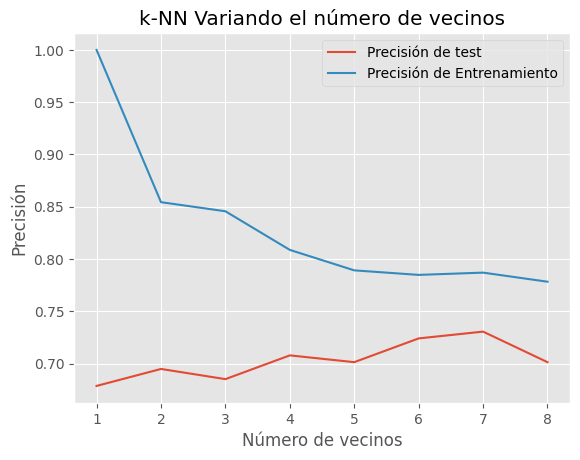

In [14]:
# Generar el gráfico
plt.title('k-NN Variando el número de vecinos')
plt.plot(neighbors, test_accuracy, label='Precisión de test')
plt.plot(neighbors, train_accuracy, label='Precisión de Entrenamiento')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('Precisión')
plt.show()


Aunque no tenemos un pico claro en donde se igualen entrenamiento y test, podemos observar que obtenemos la máxima precisión de test para k=7. Así que vamos a crear un KNeighborsClassifier con el número de vecinos como 7.

In [ ]:
# Generamos el clasificador con k = 7
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Entrenamos el modelo
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

### 1.6.1 Obtención del score

In [ ]:
# Nota: En el caso de algoritmos de clasificación, el score representa el accuracy.
knn.score(X_test,y_test)

0.7305194805194806

**Balance de clases**: Dado que el conjunto de datos estaba desbalanceado, una precisión de 73.05% podría ser engañosa. Es importante mirar otras métricas como la sensibilidad (recall), la especificidad, el valor predictivo positivo (precision), el F1-score y la curva ROC-AUC para comprender mejor cómo está funcionando el modelo para cada clase.

Recuerda que la precisión no es el único indicador de rendimiento, especialmente en problemas de salud donde las consecuencias de los falsos negativos pueden ser graves. Que se catalogue como 1 y luego sea 0, no es muy grave, pero que se catalogue como negativo y luego sea positivo, es muy grave. No solo en medicina, si no en banca tambien se puede ver.

### 1.6.2 **Matriz de confusión**

Una matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación (o "clasificador") en un conjunto de datos de prueba para los que se conocen los valores verdaderos. Scikit-learn ofrece la posibilidad de calcular la matriz de confusión utilizando el método confusion_matrix.

In [15]:
# importamos confusion_matrix
from sklearn.metrics import confusion_matrix

In [16]:
# obtengamos las predicciones utilizando el clasificador que habíamos ajustado anteriormente sobre el conjunto de test
y_pred = knn.predict(X_test)

In [17]:
confusion_matrix(y_test,y_pred)

array([[168,  33],
       [ 59,  48]])

**Verdaderos negativos (TN)**: 165 pacientes fueron correctamente identificados como no diabéticos.

**Falsos positivos (FP)**: 36 pacientes fueron incorrectamente identificados como diabéticos (cuando en realidad no lo son).

**Falsos negativos (FN)**: 47 pacientes fueron incorrectamente identificados como no diabéticos (cuando en realidad sí lo son).

**Verdaderos positivos (TP)**: 60 pacientes fueron correctamente identificados como diabéticos.

Los **falsos negativos son particularmente graves** porque los pacientes diabéticos no serían tratados.

In [18]:
# @title Extra: crosstab
# La matriz de confusión también puede obtenerse utilizando el método crosstab de pandas.
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,168,33,201
1,59,48,107
All,227,81,308


### 1.6.3 **Informe de clasificación**

Otro informe importante es el de clasificación. Se trata de un resumen de texto de la precisión, el recall y la puntuación F1 para cada clase. Scikit-learn ofrece la posibilidad de calcular el informe de clasificación utilizando el método classification_report.

In [20]:
#import classification_report
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       201
           1       0.59      0.45      0.51       107

    accuracy                           0.70       308
   macro avg       0.67      0.64      0.65       308
weighted avg       0.69      0.70      0.69       308



Precisión (Precision): **Indica la proporción de identificaciones positivas que fueron realmente correctas**. Para la clase 0 (no diabéticos), la precisión es de 0.78, lo que significa que el 78% de las veces que el modelo predijo que un paciente no tenía diabetes, estaba en lo correcto. Para la clase 1 (diabéticos), la precisión es de 0.62, así que el modelo fue correcto en su predicción de diabetes el 62% de las veces.

Recall (Sensibilidad): Muestra qué proporción de **casos positivos reales fueron identificados correctamente**. Para la clase 0, el recall es de 0.82, lo que significa que el modelo identificó correctamente el 82% de todos los casos reales no diabéticos. Para la clase 1, el recall es de 0.56, por lo que el modelo identificó correctamente el 56% de todos los casos reales de diabéticos.

F1-score: **Es una medida que combina la precisión y el recall en una sola métrica que toma en cuenta tanto la precisión como la sensibilidad**. **Un F1 alto indica un buen equilibrio entre precisión y sensibilidad**. Para la clase 0, el F1-score es 0.80 y para la clase 1 es 0.59, lo que sugiere que el modelo tiene un rendimiento generalmente mejor para la clase 0 que para la clase 1.

**La métrica de recall para la clase 1 es particularmente baja, lo que significa que el modelo está fallando en identificar una cantidad significativa de casos positivos, un aspecto importante a considerar dadas las implicaciones de salud en la detección de la diabetes.**

El informe también proporciona promedios para todas las clases:

Accuracy: La precisión global del modelo es del 73%, lo que significa que el 73% de todas las predicciones fueron correctas.

Macro Avg: Este promedio no toma en cuenta el desequilibrio de clases (es decir, cada clase contribuye por igual al promedio). Aquí, la precisión es de 0.70, el recall es de 0.69, y el F1-score es de 0.70.

Weighted Avg: Este promedio pondera cada clase por su número de muestras (support). Refleja la influencia de cada clase en el promedio basado en su representación en el conjunto de datos. Los valores son precisión de 0.73, recall de 0.73, y F1-score de 0.73.

### 1.6.4 Curva ROC (Reciever Operating Charecteristic)

Es un gráfico de la tasa de verdaderos positivos frente a la tasa de falsos positivos para los distintos puntos de corte posibles de una prueba diagnóstica.

Una curva ROC demuestra varias cosas:

1) Muestra el compromiso entre sensibilidad y especificidad (cualquier aumento de la sensibilidad irá acompañado de una disminución de la especificidad).

2) Cuanto más se acerque la curva al borde izquierdo y luego al borde superior del espacio ROC, más precisa será la prueba.

3) Cuanto más se acerque la curva a la diagonal de 45 grados del espacio ROC, menos precisa será la prueba.

4) El área bajo la curva es una medida de la precisión de la prueba.

In [22]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [23]:
from sklearn.metrics import roc_curve

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

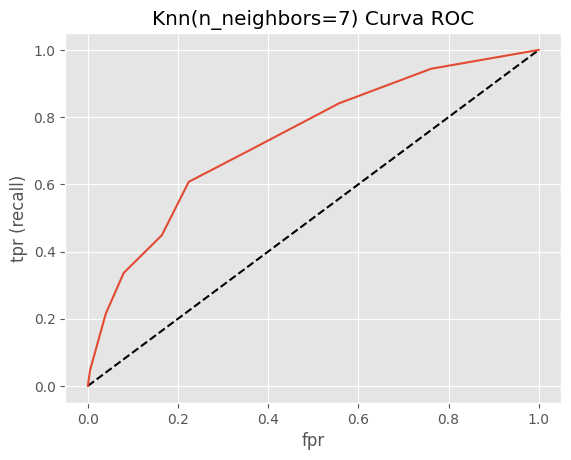

In [25]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr (recall)')
plt.title('Knn(n_neighbors=7) Curva ROC')
plt.show()

En la gráfica:

* La línea punteada representa la curva ROC de un clasificador completamente aleatorio. Un buen modelo se esfuerza por alejarse de esta línea hacia la esquina superior izquierda del gráfico.

* La curva ROC del modelo kNN (con k=7) muestra el rendimiento del modelo a varios umbrales de clasificación. Cuanto más se curve hacia la esquina superior izquierda (TPR=1, FPR=0), mejor será el modelo.

Análisis de la curva ROC:

* La curva parece estar por encima de la línea de no-discriminación (línea punteada), lo cual es bueno. Esto indica que el modelo tiene una capacidad de discriminación mejor que la aleatoria.
* La distancia vertical desde la línea punteada hasta la curva ROC es indicativa de la capacidad del modelo para lograr una tasa de verdaderos positivos más alta antes de aumentar la tasa de falsos positivos.
* Idealmente, querrías que la curva se acercara más a la esquina superior izquierda, lo que indicaría una tasa alta de verdaderos positivos y una tasa baja de falsos positivos.

En resumen, el modelo tiene un rendimiento razonable en términos de discriminación de las clases, pero podría beneficiarse de la optimización para mejorar la sensibilidad o especificidad según las necesidades clínicas y los costos asociados con los falsos positivos y falsos negativos.

In [26]:
# Curva área under ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7358534430650485

## 1.7 **Cross Validation / Validación cruzada**

Antes de entrar en detalles sobre el ajuste del hiperparámetro, entendamos el concepto de validación cruzada.

La validación cruzada es una técnica que se usa para asegurarnos de que el modelo de aprendizaje automático que estamos construyendo funciona bien no solo con los datos que usó para aprender, sino también con datos nuevos que nunca ha visto. Es como si hiciéramos muchos mini-exámenes al modelo con distintos conjuntos de preguntas para asegurarnos de que realmente sabe el material y no solo se aprendió las respuestas de memoria.

Imagina que tienes un grupo de estudiantes y quieres saber cuán bien pueden hacer una tarea. Pero en lugar de darle a cada uno el mismo examen, divides la tarea en partes y les das a cada uno una parte diferente para trabajar. Luego, rotas las partes entre los estudiantes de tal manera que todos terminen trabajando en todas las partes. Al final, puedes ver cuán bien cada estudiante ha realizado la tarea completa al promediar sus resultados en todas las partes. Esto ayuda a evitar que un estudiante obtenga una buena calificación solo porque le tocó la parte más fácil.

En el contexto de un modelo de aprendizaje automático como k-NN, la "validación cruzada k-fold" significa que dividimos nuestros datos en "k" partes, y:

1. Entrenamos nuestro modelo en k-1 de esas partes (los "folds" o pliegues).
2. Probamos cómo le va al modelo en la parte que no usamos para entrenar.
3. Repetimos este proceso "k" veces, cada vez con una parte diferente reservada para la prueba.
4. Al final, promediamos los resultados para obtener una medida del rendimiento del modelo.

Ahora, para el ajuste de hiperparámetros, que es básicamente encontrar la mejor configuración para nuestro modelo (como decidir cuántos vecinos usar en k-NN), usamos algo llamado "GridSearchCV". Este método prueba muchas configuraciones diferentes (en este caso, diferentes números de vecinos), usa la validación cruzada para ver cómo le va a cada configuración y luego selecciona la configuración que obtuvo la mejor puntuación promedio. Así nos aseguramos de que no solo estamos eligiendo una configuración que funcionó bien por casualidad en un solo conjunto de datos, sino una que es consistentemente buena a través de diferentes partes de los datos.



In [ ]:
# importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Se introduce un rango de vecinos a estudiar
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.7578558696205755

In [ ]:
knn_cv.best_params_

{'n_neighbors': 14}

De lo que podemos sacar que un clasificador knn con un número de vecinos de 14 obtiene la mejor puntuación/exactitud de 0,7578, es decir, alrededor del 76% de acierto en la clasificación.